## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read in the data from file and store in a dataframe object
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
number_of_rows = df.shape[0]
number_of_rows

294478

c. The number of unique users in the dataset.

In [4]:
number_of_unique_users = df['user_id'].nunique()
number_of_unique_users

290584

d. The proportion of users converted.

In [5]:
converted_count = df.query('converted == "1"').shape[0]
total_count = df.shape[0]
proportion = converted_count/total_count
proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
aggregate_df = df.loc[:,('user_id','group','landing_page')].groupby(['group','landing_page'],as_index = False)['user_id'].count()
aggregate_df

,group,landing_page,user_id
0,control,new_page,1928
1,control,old_page,145274
2,treatment,new_page,145311
3,treatment,old_page,1965


In [7]:
first_time = aggregate_df.iloc[0,2]
second_time = aggregate_df.iloc[3,2]
number_diff = first_time + second_time
number_diff

3893

f. Do any of the rows have missing values?

In [8]:
#None of the rows have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#We will have to remove these data observations (only keep what we need)
df2 = df.query('group == "treatment" & landing_page == "new_page" | group == "control" & landing_page == "old_page" ')
aggregate_df2 = df2.loc[:,('user_id','group','landing_page')].groupby(['group','landing_page'],as_index = False)['user_id'].count()
aggregate_df2

,group,landing_page,user_id
0,control,old_page,145274
1,treatment,new_page,145311


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
number_of_unique_users = df2['user_id'].nunique()
number_of_unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
user_id = df2.groupby(['user_id'],as_index = True).count().query('timestamp > 1').index[0]
user_id

773192

In [13]:
#The id from the previous cell is now passed in here
df2.query('user_id == @user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#I remove the last observation for this user
df2.drop([2893],inplace=True);

C:\Users\Byron\Applications\DataScienceToolkit\Anaconda\envs\UdacityProject4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#Now let's check if only one observation remains
df2.query('user_id == @user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#Let's just have a look at the data again
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
#Prior probabilities:
#Regardless of the page - we need to count who has converted over all groups
P_converting = df2.query('converted == 1').shape[0]/df2.shape[0]
P_converting

0.11959708724499628

In [18]:
#The opposite
P_notconverting = 1 - P_converting
P_notconverting

0.8804029127550037

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#Now we need to filter for only the one group
control = df2.query('group == "control"')
P_newpagegivencontrolgroup = control.query('converted == 1').shape[0]/control.shape[0]
P_newpagegivencontrolgroup

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Now we need to filter for only the other group
treatment = df2.query('group == "treatment"')
P_oldpagegiventreatmentgroup = treatment.query('converted == 1').shape[0]/treatment.shape[0]
P_oldpagegiventreatmentgroup

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
#Regardsless of the group, who received a new page
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**I do not think there is enough evidence based on these measures.
50% of the sample received the new page and 50% received the old page.
Out of the 50% that received the new page, within the treatment group about 12% converted back to the old page.
Out of the 50% that received the old page, within the control group about 12% converted over to the new page.
In other words the gain on the one side is the same as the loss on the other.
I would say that the experiment needs to run a bit longer so that more observations can be collected.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$ H_0: p_{new} - p_{old} \leq 0 \hspace{1cm} no\hspace{0.2cm}improvement\\
H_1: p_{new} - p_{old} > 0 \hspace{1cm} some\hspace{0.2cm}improvement $


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#Read in the data and store in a dataframe object
ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
#Have to get the data alignment right:
ab2 = ab.query('group == "control" & landing_page == "old_page" | group == "treatment" & landing_page == "new_page"')

In [24]:
#Check for duplicate users (there is one):
sum(ab2.loc[:,('user_id')].duplicated())

1

In [25]:
#What records are duplicate
user_id = ab2[ab2.loc[:,('user_id')].duplicated()].loc[ab2[ab2.loc[:,('user_id')].duplicated()].index[0],'user_id']
ab2.query('user_id == @user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [26]:
#Remove the last observation
ab2.drop([2893],inplace=True);

C:\Users\Byron\Applications\DataScienceToolkit\Anaconda\envs\UdacityProject4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
#Check to make sure it was removed
ab2.query('user_id == @user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [29]:
#Based on the assumption we can do this (this will be a sample observation for success from our dataset):
p_new = ab2.query('converted == 1').shape[0]/ab2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
#Under the null hypothesis assumption they are the same (this will be a sample observation for no success from our dataset)
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [31]:
#The number of observations for new page (sample size)
n_new = ab2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [32]:
#The number of observations for old page (sample size)
n_old = ab2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
#Here I use numpy to generate random 0,1 values. 1 is selected with a success rate of p_new and 0 the alternative rate (1 - p_new)
new_page_converted = np.random.choice([1,0],size = n_new,replace = True,p = [p_new,1-p_new])
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
#Here I use numpy to generate random 0,1 values. 1 is selected with a success rate of p_old and 0 the alternative rate (1 - p_old)
old_page_converted = np.random.choice([1,0],size = n_old,replace = True,p = [p_old,1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
#For these random generated samples we need to calculate our proportions, thereafter it will be used to calculate our metric.
#This will be a sample for our metric selected from a random sample generation
p_new_generated_sample = np.sum(new_page_converted)/np.size(new_page_converted)
p_old_generated_sample = np.sum(old_page_converted)/np.size(old_page_converted)
metric_generated_sample = p_new_generated_sample - p_old_generated_sample
metric_generated_sample

-0.00051163582497001925

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [36]:
#Create a sampling distribution for our metric
#The probability for selecting 0,1 has to remain the same as the observation returned from the original dataset (ab2)
p_diffs = []
for i in range(0,10000):
    new_page_converted = np.random.choice([1,0],size = n_new,replace = True,p = [p_new,1-p_new])
    old_page_converted = np.random.choice([1,0],size = n_old,replace = True,p = [p_old,1-p_old])
    p_new_sample = np.sum(new_page_converted)/np.size(new_page_converted)
    p_old_sample = np.sum(old_page_converted)/np.size(old_page_converted)
    metric = p_new_sample - p_old_sample
    p_diffs.append(metric)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

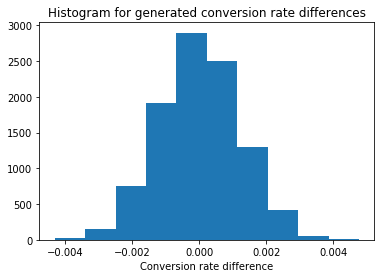

In [38]:
#This plot looks almost normal distributed, which is what I expected due to the central limit theorem.
#This theorem states that if the sample size is large enough, the sampling distribution of the metric will be normally distributed
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.title('Histogram for generated conversion rate differences');
plt.xlabel('Conversion rate difference');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
#The actual observation of our metric within our original clean data set (ab2)
p_old_actual = ab2.query('landing_page == "old_page" & converted == 1').shape[0]/ab2.query('landing_page == "old_page"').shape[0]
p_new_actual = ab2.query('landing_page == "new_page" & converted == 1').shape[0]/ab2.query('landing_page == "new_page"').shape[0]
actual_metric = p_new_actual - p_old_actual
actual_metric

-0.0015782389853555567

In [40]:
#Calculate the p-value compared to an actual observation
np.mean(p_diffs > actual_metric)

0.90590000000000004

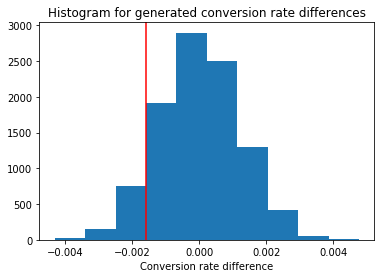

In [41]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(actual_metric,color='r');
plt.title('Histogram for generated conversion rate differences');
plt.xlabel('Conversion rate difference');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated is known as the p-value. Which is the probability of observing our metric (p_new - p_old) in favour of the alternative. Since our p-value is > alpha of 0.05 we do not have statistical evidence to reject the null hypothesis (fail to reject).<br>
note:The answer here keeps changing (p-value) depending on the sample distribution generated everytime the notebook is run**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
import statsmodels.api as sm

C:\Users\Byron\Applications\DataScienceToolkit\Anaconda\envs\UdacityProject4\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
convert_old = ab2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = ab2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = ab2.query('landing_page == "old_page"').shape[0]
n_new = ab2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [57]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], value=None, prop_var=False)
z_score,p_value

(1.3109241984234394, 0.18988337448195103)

In [58]:
from scipy.stats import norm

significance = norm.cdf(z_score)
# 0.90505831275902449 # Tells us how significant our z-score is

critical_val = norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

significance,critical_val

(0.90505831275902449, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score < critical_val we fail to reject the null hypothesis. This does agree with my previous findings. The significance value for the z test is similar to the p-value for the ealier analysis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I would say a logistic regression model would fit this scenario well, since our response variable is binomial categorical.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [47]:
ab2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [48]:
#Create intercept
ab2['intercept'] = 1
ab2.head()

C:\Users\Byron\Applications\DataScienceToolkit\Anaconda\envs\UdacityProject4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [49]:
#Create dummy variables for categorical explanatory variables
ab2[['control','treatment']] = pd.get_dummies(ab2['group'])
ab2.head()

C:\Users\Byron\Applications\DataScienceToolkit\Anaconda\envs\UdacityProject4\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [50]:
#Rename the dummy variable
ab2 = ab2.rename(columns = {'treatment':'ab_page'})
ab2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [51]:
#Refine the dataset
model_frame = ab2.loc[:,('converted','intercept','ab_page')]
model_frame.head()

,converted,intercept,ab_page
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,1
4,1,1,0


In [52]:
#Train a logistic regression model
model = sm.Logit(model_frame['converted'],model_frame[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        20:18:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [54]:
#Log of odds ratio
np.exp(-0.0150)

0.98511193960306265

In [55]:
#odds ratio
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value = 0.190. In the regression model we want to prove if the ab_page variable is different from 0 (two tail test). In our earlier model we looked at the difference in conversion rate to prove that there is an improvement (one tail test). The odds ratio is 0.015 higher of converting when being in the treatment group compared to being in the control group**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**By adding in additional variables we can observe if there are perhaps something else that can explain the change in behaviour (response variable). The problems that could be introduced is that of multiCollinearity and outliers**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [59]:
#Read in the country data
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(ab2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [60]:
country_val = df_new['country'].unique()
country_val

array(['UK', 'US', 'CA'], dtype=object)

In [61]:
#Create dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [62]:
#Review the data
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [63]:
#Train a logistic regression model
model = sm.Logit(df_new['converted'],df_new[['intercept','UK','CA']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [64]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Jan 2018   Pseudo R-squ.:               1.521e-05
Time:                        20:27:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
UK            -0.0507      0.028     -1.786      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [65]:
#log odds ratio
np.exp(-0.0507),np.exp(-0.0099)

(0.95056379690040338, 0.99014884368295719)

In [66]:
#odds ratio
1/np.exp(-0.0507),1/np.exp(-0.0099)

(1.0520072437650141, 1.009949167117542)

**The p-value for CA is high which implies that this is not statistically significant. However the odds of converting is 0.05 times more likely in the UK compared to the US (baseline) keeping CA constant**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
#Create interaction variables
df_new['page_UK'] = df_new['ab_page']*df_new['UK']
df_new['page_CA'] = df_new['ab_page']*df_new['CA']

In [68]:
#Review the data
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,UK,US,CA,page_UK,page_CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0


In [69]:
#higher order and lower order terms must be added
model_interaction = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA','page_UK','page_CA']])
result = model_interaction.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Jan 2018   Pseudo R-squ.:               3.482e-05
Time:                        20:29:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
page_UK       -0.0783      0.057     -1.378      0.168      -0.190       0.033
page_CA       -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**
The conclusion is that there is not enough evidence to reject the null hypothesis and my recommendation would be to keep the old page as the new page did not bring improvement. Looking at the last applied regression model the combination of the explanatory categorical variables is no longer statistically significant, this implies that they cannot be relied on for predicting the conversion rate
** 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.